In [0]:
% tensorflow_version 2.x

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

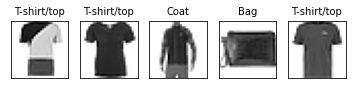

In [204]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

### 資料整理

In [205]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [207]:
x_train[99].shape

(28, 28, 1)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##### 讀入函式


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

打造函數學習機 (CNN)

In [0]:
model = Sequential()

##### Model1
 - Convolution Layer: 3層
 - Pooling Layer: 3層(2*2)
 - Filter(Kernel:size): 3*3
 - Filter(Kernel個數):16, 32, 64


In [0]:
model1 = Sequential()

In [0]:
# Convolution第一層
model1.add(Conv2D(filters=16, 
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [0]:
# Pooling第一層
model1.add(MaxPooling2D(pool_size=(2,2)))   # (14, 14, 16)

In [0]:
# Convolution第二層
model1.add(Conv2D(32, (3,3), padding='same', activation='relu'))  # output (14, 14, 32)

In [0]:
# Pooling第二層
model1.add(MaxPooling2D(pool_size=(2,2)))  # output (7, 7, 32)

In [0]:
# Convolution第三層
model1.add(Conv2D(64, (3,3), padding='same', activation='relu'))

In [0]:
# Pooling第三層
model1.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model1.add(Flatten())

In [0]:
model1.add(Dense(50, activation='relu')) #50為自訂

In [0]:
model1.add(Dense(10, activation='softmax')) #輸出固定

In [222]:
model1.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 576)             

In [0]:
model1.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

##### Model2 (改變kernel size)
 - Convolution Layer: 3層
 - Pooling Layer: 3層(2*2)
 - Filter(Kernel size):5*5 
 - Filter(Kernel個數):16, 32, 64


In [0]:
model2= Sequential()

In [0]:
# Convolution第一層
model2.add(Conv2D(filters=16, 
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [0]:
# Pooling第一層
model2.add(MaxPooling2D(pool_size=(2,2)))   # (14, 14, 16)

In [0]:
# Convolution第二層
model2.add(Conv2D(32, (5,5), padding='same', activation='relu'))  # output (14, 14, 32)

In [0]:
# Pooling第二層
model2.add(MaxPooling2D(pool_size=(2,2)))  # output (7, 7, 32)

In [0]:
# Convolution第三層
model2.add(Conv2D(64, (5,5), padding='same', activation='relu'))

In [0]:
# Pooling第三層
model2.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model2.add(Flatten())

In [0]:
model2.add(Dense(50, activation='relu')) #50為自訂

In [0]:
model2.add(Dense(10, activation='softmax')) #輸出固定

In [234]:
model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 576)             

In [0]:
model2.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

##### Model3 (改變Kernel個數和loss function)
 - Convolution Layer: 4層
 - Pooling Layer: 4層(2*2)
 - Filter(Kernel:size):5*5
 - Filter(Kernel個數): 8, 16, 32, 64
 - **Loss Function: mae**


In [0]:
model3= Sequential()

In [0]:
# Convolution第一層
model3.add(Conv2D(filters=8, 
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [0]:
# Pooling第一層
model3.add(MaxPooling2D(pool_size=(2,2)))   # (14, 14, 8)

In [0]:
# Convolution第二層
model3.add(Conv2D(16, (5,5), padding='same', activation='relu'))  # output (14, 14, 16)

In [0]:
# Pooling第二層
model3.add(MaxPooling2D(pool_size=(2,2)))  # output (7, 7, 16)

In [0]:
# Convolution第三層
model3.add(Conv2D(32, (5,5), padding='same', activation='relu'))

In [0]:
# Pooling第三層
model3.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# Convolution第四層
model3.add(Conv2D(64, (5,5), padding='same', activation='relu'))

In [0]:
# Pooling第四層
model3.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model3.add(Flatten())

In [0]:
model3.add(Dense(50, activation='relu')) #50為自訂

In [0]:
model3.add(Dense(10, activation='softmax')) #輸出固定

In [248]:
model3.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 14, 14, 16)        3216      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 7, 7, 32)          12832     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 3, 3, 64)        

In [0]:
model3.compile(loss='mae', optimizer=SGD(lr=0.087), metrics=['accuracy'])

##### Model4 (改變loss function)
 - Convolution Layer: 3層
 - Pooling Layer: 3層(2*2)
 - Filter(Kernel:size):5*5
 - Filter(Kernel個數): 16, 32, 64
 - **Loss Function: mae**


In [0]:
model4= Sequential()

In [0]:
# Convolution第一層
model4.add(Conv2D(filters=16, 
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

In [0]:
# Pooling第一層
model4.add(MaxPooling2D(pool_size=(2,2)))   # (14, 14, 16)

In [0]:
# Convolution第二層
model4.add(Conv2D(32, (5,5), padding='same', activation='relu'))  # output (14, 14, 16)

In [0]:
# Pooling第二層
model4.add(MaxPooling2D(pool_size=(2,2)))  # output (7, 7, 16)

In [0]:
# Convolution第三層
model4.add(Conv2D(64, (5,5), padding='same', activation='relu'))

In [0]:
# Pooling第三層
model4.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model4.add(Flatten())

In [0]:
model4.add(Dense(50, activation='relu')) #50為自訂

In [0]:
model4.add(Dense(10, activation='softmax')) #輸出固定

In [260]:
model4.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 7, 7, 64)          51264     
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 576)             

In [0]:
model4.compile(loss='mae', optimizer=SGD(lr=0.087), metrics=['accuracy'])

##### 模型結果

In [262]:
model1.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
469/469 [==============================] - 39s 84ms/step - loss: 0.0897 - accuracy: 0.1701
Epoch 2/12
469/469 [==============================] - 39s 84ms/step - loss: 0.0887 - accuracy: 0.2691
Epoch 3/12
469/469 [==============================] - 39s 84ms/step - loss: 0.0796 - accuracy: 0.3834
Epoch 4/12
469/469 [==============================] - 39s 84ms/step - loss: 0.0518 - accuracy: 0.6351
Epoch 5/12
469/469 [==============================] - 39s 84ms/step - loss: 0.0397 - accuracy: 0.7105
Epoch 6/12
469/469 [==============================] - 40s 84ms/step - loss: 0.0358 - accuracy: 0.7431
Epoch 7/12
469/469 [==============================] - 44s 93ms/step - loss: 0.0336 - accuracy: 0.7605
Epoch 8/12
469/469 [==============================] - 39s 84ms/step - loss: 0.0319 - accuracy: 0.7761
Epoch 9/12
469/469 [==============================] - 39s 84ms/step - loss: 0.0307 - accuracy: 0.7855
Epoch 10/12
469/469 [==============================] - 39s 84ms/step - loss: 0.029

In [263]:
model2.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0880 - accuracy: 0.2464
Epoch 2/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0571 - accuracy: 0.5763
Epoch 3/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0395 - accuracy: 0.7162
Epoch 4/12
469/469 [==============================] - 81s 172ms/step - loss: 0.0353 - accuracy: 0.7473
Epoch 5/12
469/469 [==============================] - 83s 178ms/step - loss: 0.0328 - accuracy: 0.7689
Epoch 6/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0309 - accuracy: 0.7825
Epoch 7/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0295 - accuracy: 0.7950
Epoch 8/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0280 - accuracy: 0.8048
Epoch 9/12
469/469 [==============================] - 80s 170ms/step - loss: 0.0269 - accuracy: 0.8120
Epoch 10/12
469/469 [==============================] - 80s 171ms/step - l

In [264]:
model3.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
469/469 [==============================] - 54s 115ms/step - loss: 0.1797 - accuracy: 0.1432
Epoch 2/12
469/469 [==============================] - 50s 107ms/step - loss: 0.1751 - accuracy: 0.1588
Epoch 3/12
469/469 [==============================] - 50s 107ms/step - loss: 0.1136 - accuracy: 0.4618
Epoch 4/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0846 - accuracy: 0.5875
Epoch 5/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0793 - accuracy: 0.6138
Epoch 6/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0760 - accuracy: 0.6275
Epoch 7/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0728 - accuracy: 0.6416
Epoch 8/12
469/469 [==============================] - 50s 107ms/step - loss: 0.0709 - accuracy: 0.6507
Epoch 9/12
469/469 [==============================] - 50s 108ms/step - loss: 0.0696 - accuracy: 0.6565
Epoch 10/12
469/469 [==============================] - 50s 107ms/step - l

In [265]:
model4.fit(x_train, y_train, batch_size=128, epochs=12)

Epoch 1/12
469/469 [==============================] - 83s 177ms/step - loss: 0.1786 - accuracy: 0.1135
Epoch 2/12
469/469 [==============================] - 79s 169ms/step - loss: 0.1235 - accuracy: 0.4342
Epoch 3/12
469/469 [==============================] - 79s 169ms/step - loss: 0.0840 - accuracy: 0.5926
Epoch 4/12
469/469 [==============================] - 79s 169ms/step - loss: 0.0798 - accuracy: 0.6100
Epoch 5/12
469/469 [==============================] - 79s 169ms/step - loss: 0.0770 - accuracy: 0.6234
Epoch 6/12
469/469 [==============================] - 79s 169ms/step - loss: 0.0747 - accuracy: 0.6335
Epoch 7/12
469/469 [==============================] - 79s 169ms/step - loss: 0.0734 - accuracy: 0.6379
Epoch 8/12
469/469 [==============================] - 83s 177ms/step - loss: 0.0723 - accuracy: 0.6435
Epoch 9/12
469/469 [==============================] - 79s 169ms/step - loss: 0.0716 - accuracy: 0.6460
Epoch 10/12
469/469 [==============================] - 79s 169ms/step - l

In [0]:
result1 = model1.predict_classes(x_test)
result2 = model1.predict_classes(x_test)
result3 = model1.predict_classes(x_test)
result4 = model1.predict_classes(x_test)

##### 測試model1

In [0]:
def my_predict1(n):
    print('我的 CNN 預測是', result1[n])
    X = x_test[n].reshape(28,28)                #原本是28*28*1，需要reshape成28*28
    plt.imshow(X, cmap='Greys')

In [268]:
from ipywidgets import interact_manual
interact_manual(my_predict1, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict1>

In [269]:
score1 = model1.evaluate(x_test, y_test) #看測試資料的正確率

313/313 [==============================] - 3s 10ms/step - loss: 0.0300 - accuracy: 0.7851


In [270]:
loss, acc = score1
print('model1測試資料的正確率為', acc, 'loss為', loss)

model1測試資料的正確率為 0.785099983215332 loss為 0.029959194362163544


##### 測試model2


In [0]:
def my_predict2(n):
    print('我的 CNN 預測是', result2[n])
    X = x_test[n].reshape(28,28)                #原本是28*28*1，需要reshape成28*28
    plt.imshow(X, cmap='Greys')

In [272]:
interact_manual(my_predict2, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict2>

In [273]:
score2 = model2.evaluate(x_test, y_test) #看測試資料的正確率

313/313 [==============================] - 4s 14ms/step - loss: 0.0255 - accuracy: 0.8219


In [274]:
loss, acc = score2
print('model2測試資料的正確率為', acc, 'loss為', loss)

model2測試資料的正確率為 0.8219000101089478 loss為 0.025514444336295128


##### 測試model3


In [0]:
def my_predict3(n):
    print('我的 CNN 預測是', result3[n])
    X = x_test[n].reshape(28,28)                #原本是28*28*1，需要reshape成28*28
    plt.imshow(X, cmap='Greys')

In [276]:
interact_manual(my_predict3, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict3>

In [277]:
score3 = model3.evaluate(x_test, y_test) #看測試資料的正確率

313/313 [==============================] - 4s 13ms/step - loss: 0.0673 - accuracy: 0.6672


In [278]:
loss, acc = score3
print('model3測試資料的正確率為', acc, 'loss為', loss)

model3測試資料的正確率為 0.6672000288963318 loss為 0.0672609806060791


##### 測試model4


In [0]:
def my_predict4(n):
    print('我的 CNN 預測是', result4[n])
    X = x_test[n].reshape(28,28)                #原本是28*28*1，需要reshape成28*28
    plt.imshow(X, cmap='Greys')

In [280]:
interact_manual(my_predict4, n=(0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict4>

In [281]:
score4 = model4.evaluate(x_test, y_test) #看測試資料的正確率

313/313 [==============================] - 4s 14ms/step - loss: 0.0715 - accuracy: 0.6450


In [282]:
loss, acc = score4
print('model4測試資料的正確率為', acc, 'loss為', loss)

model4測試資料的正確率為 0.6449999809265137 loss為 0.07153147459030151


### 模型比較


1.   Model 1 (原始模型)

*   39s 84ms/step - loss: 0.0278 - accuracy: 0.8061

> 測試資料

*   正確率: 0.785
*   loss: 0.030


---

2.   Model 2 (增加kernel size)

*   80s 170ms/step - loss: 0.0245 - accuracy: 0.8313

> 測試資料

*   正確率: 0.8219
*   loss: 0.0255


---

3.   Model 3 (增加convolutional & pooling layer，嘗試loss='mae')

*   50s 107ms/step - loss: 0.0665 - accuracy: 0.6713

> 測試資料

*   正確率: 0.6672
*   loss: 0.0673


---

4.   Model 4 ***(loss嘗試 'mae')***

*   79s 168ms/step - loss: 0.0701 - accuracy: 0.6532

> 測試資料

*  正確率:0.6450
*  loss:0.0715


---

結論:
增加kernel size有稍微提升模型的準確度，但相對的時間也增加蠻多的。
將loss function改為'mae'下，這個模型顯示的準確度下降，執行的時間也增加。
增加convolutional layer & pooling layer在這次模型有稍稍增加模型的準確度。

--->「MSE的梯度變化會隨著你帶進去的點變化，離最佳解越遠梯度越大，越靠近解梯度越小，而MAE的部分梯度是一個定值，看起來很小，但靠近解的時候這個值又太大。」
https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92-%E5%9F%BA%E7%A4%8E%E4%BB%8B%E7%B4%B9-%E6%90%8D%E5%A4%B1%E5%87%BD%E6%95%B8-loss-function-2dcac5ebb6cb

 以後loss function還是使用MSE就好，不只解釋方便也省運算時間。 
 這次作業原本還有嘗試看看增加filter(32,64,128,256)發現非常耗時，且準確率也沒有比較高，可以說是相對比較沒有效率的因此沒有放上來了。


















>  





---



